In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from statsmodels.multivariate.pca import PCA as smPCA

sns.set_style("darkgrid")
import os
from CorePtf import CorePtf

In [2]:
path = os.path.join(os.path.dirname(os.getcwd()), "Data")
returns = pd.read_excel(os.path.join(path, "Data.xlsx"), sheet_name="RETURNS").rename(
    columns={"Unnamed: 0": "Date"}
)
returns = returns.set_index("Date")
returns.head()

,EUROSTOXX50,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-31,0.032523,0.054383,0.003162,0.075629,0.041231,0.010972,0.036812,0.097633,0.002335,-0.026051,...,0.076236,0.019595,0.061884,0.100177,0.055098,0.141340,-0.011803,0.070689,-0.025699,0.091075
2006-02-28,0.022783,0.000543,0.077163,-0.046946,-0.021275,-0.046203,0.020732,-0.061456,-0.024685,-0.016879,...,-0.017479,-0.053677,0.042739,0.015130,0.025850,-0.002907,0.030260,-0.071304,-0.012797,0.219389
2006-03-31,0.021922,-0.002326,-0.051172,-0.005057,0.037439,0.130364,0.017577,-0.032165,0.022768,-0.021617,...,-0.020598,0.099439,-0.016324,0.046520,0.000520,0.039068,0.000768,0.031755,0.113553,0.047422
2006-04-28,-0.001103,0.045571,0.009242,0.025480,-0.001745,-0.100372,-0.036871,-0.002967,0.050386,0.107398,...,-0.027246,-0.047770,0.019916,-0.032454,-0.026485,0.007295,-0.019305,0.006891,0.021172,-0.028490
2006-05-31,-0.042522,-0.061532,-0.025948,-0.067838,-0.032199,-0.092904,-0.071193,-0.060119,-0.038437,-0.017612,...,-0.137736,-0.016054,-0.072645,-0.045965,-0.105059,-0.075689,0.025819,-0.048478,0.002404,-0.081681


In [3]:
path = os.path.join(os.path.dirname(os.getcwd()), "Data")
rf = pd.read_excel(
    os.path.join(path, "Risk_free_rate.xlsx"), sheet_name="FRED Graph", skiprows=10
)
rf.set_index("observation_date", inplace=True)
rf.rename(columns={"IRLTLT01FRM156N": "10Y OAT"}, inplace=True)
rf

,10Y OAT
observation_date,
2006-02-01,0.035080
2006-03-01,0.036854
2006-04-01,0.039535
2006-05-01,0.040014
2006-06-01,0.040062
...,...
2023-09-01,0.032400
2023-10-01,0.034500
2023-11-01,0.031900


In [4]:
returns.describe()

,EUROSTOXX50,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.004719,0.009235,0.009438,0.011469,0.010269,0.012790,0.009630,0.022416,0.008509,0.005336,...,0.014702,0.005677,0.004669,0.009625,0.009900,0.012340,0.001822,0.007152,0.007125,0.015072
std,0.050765,0.077033,0.056254,0.081256,0.048141,0.097264,0.075614,0.084336,0.077142,0.077143,...,0.084905,0.055697,0.094139,0.067043,0.074604,0.069379,0.068537,0.061974,0.060066,0.110054
min,-0.162104,-0.344929,-0.160601,-0.269759,-0.134537,-0.451064,-0.397383,-0.230652,-0.227555,-0.242912,...,-0.354230,-0.177535,-0.333333,-0.310862,-0.293385,-0.224832,-0.221362,-0.142883,-0.167168,-0.449053
25%,-0.026895,-0.033515,-0.026484,-0.037737,-0.018405,-0.039596,-0.037497,-0.032616,-0.033279,-0.040933,...,-0.032477,-0.028364,-0.045075,-0.027954,-0.033332,-0.031554,-0.037932,-0.034402,-0.024462,-0.044302
50%,0.008448,0.011636,0.006234,0.004717,0.012138,0.014049,0.014540,0.018435,0.002692,0.008405,...,0.019366,0.007337,0.006434,0.008691,0.011766,0.016421,0.002278,0.007288,0.009075,0.013949
75%,0.038988,0.052773,0.048208,0.066161,0.037717,0.067244,0.056948,0.081537,0.056746,0.059824,...,0.060392,0.042959,0.054954,0.047408,0.055410,0.056590,0.042012,0.039040,0.045239,0.079135
max,0.180858,0.286258,0.164499,0.235201,0.139238,0.401661,0.308488,0.358156,0.302945,0.205594,...,0.351083,0.127686,0.474521,0.240377,0.232395,0.191674,0.303277,0.387490,0.160553,0.379032


In [5]:
stocks = returns.columns.tolist()
model = CorePtf()
model.compute_core_equity_ptf()

,weights
ANHEUSER-BUSCH INBEV SA/NV,0.016444
KONINKLIJKE AHOLD DELHAIZE N,0.013439
ADIDAS AG,0.017444
AIR LIQUIDE SA,0.025969
AIRBUS SE,0.018155
ALLIANZ SE-REG,0.027373
ASML HOLDING NV,0.017927
BASF SE,0.028712
BAYER AG-REG,0.023828
BANCO BILBAO VIZCAYA ARGENTA,0.023681


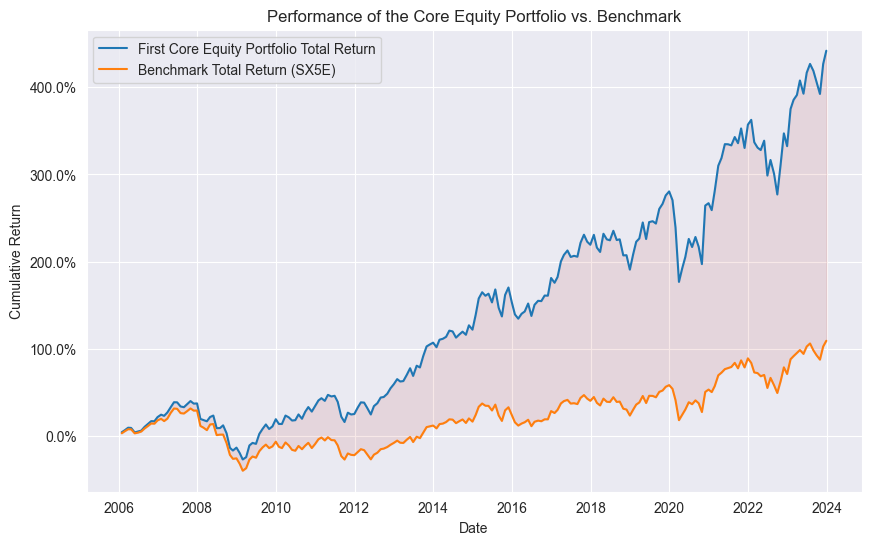

In [6]:
model.plot_compared_performance()

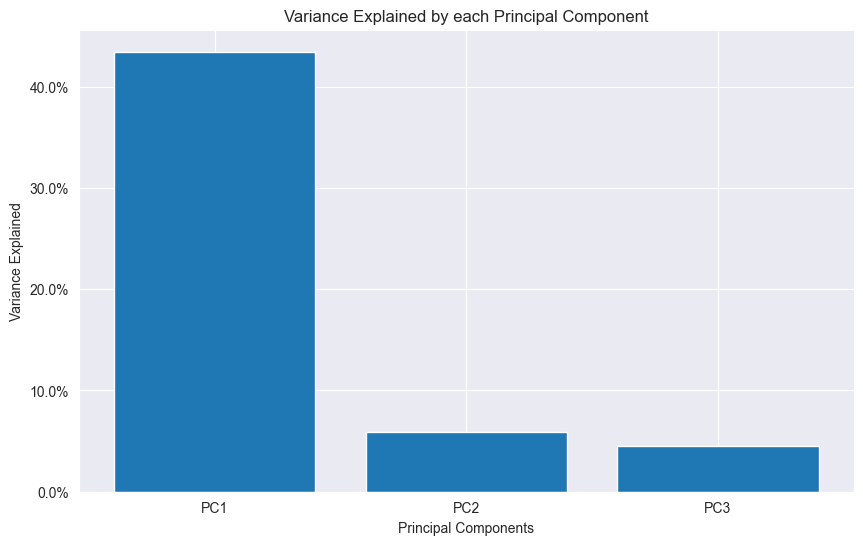

In [7]:
model.plot_variance_explained()

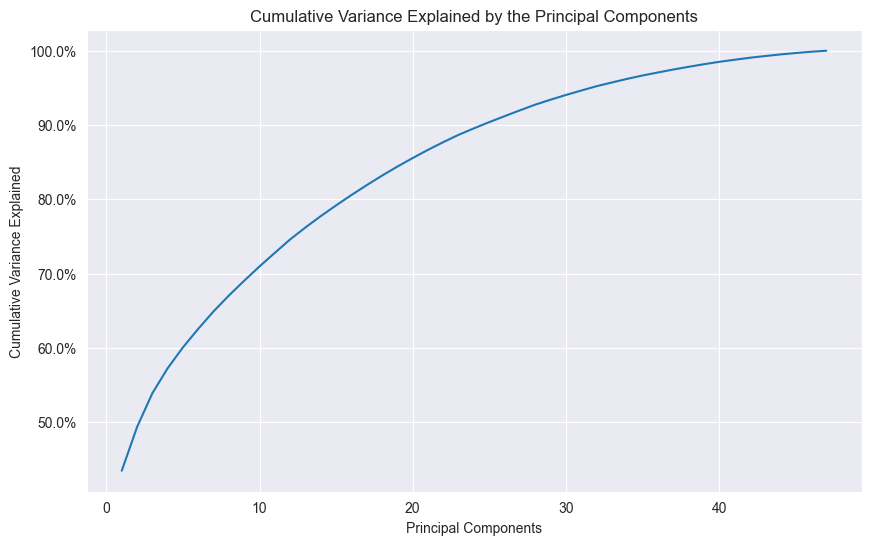

In [8]:
model.plot_cumulative_variance_explained()

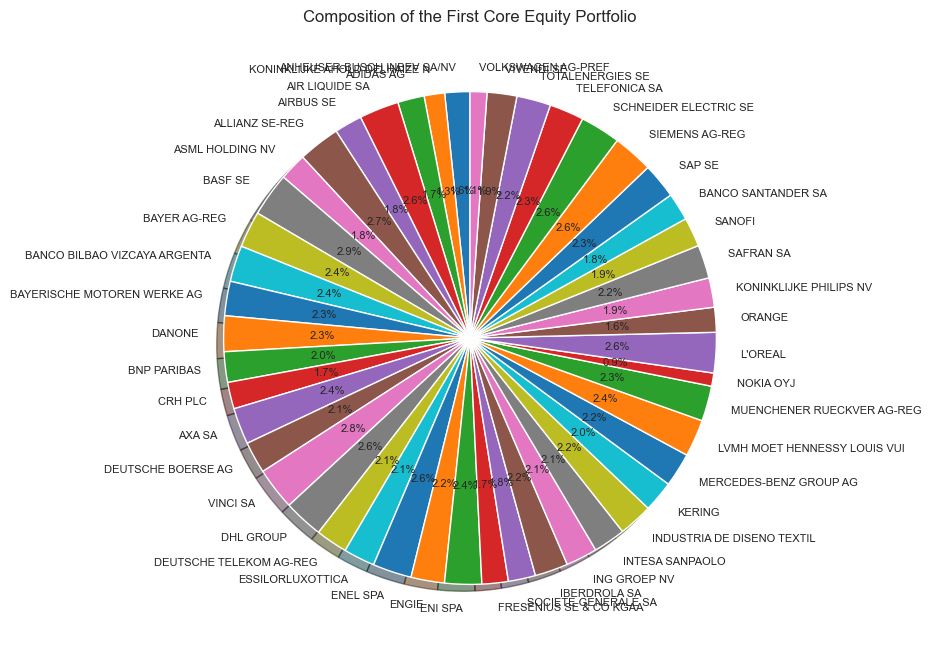

In [9]:
model.total_return_benchmark
model.plot_core_ptf_comp()

In [10]:
model.total_return_core_ptf

Date
2006-01-31    0.044782
2006-02-28    0.067525
2006-03-31    0.096392
2006-04-28    0.093882
2006-05-31    0.042522
                ...   
2023-08-31    4.188186
2023-09-29    4.063874
2023-10-31    3.922913
2023-11-30    4.267269
2023-12-29    4.418628
Length: 216, dtype: float64

In [11]:
model.alpha_core_ptf()
ptf_stat = model.ptf_stats
ptf_stat

{'Average return (annualized)': 0.1097,
 'Total return': 4.4186,
 'Volatility (annualized)': 0.4189,
 'Alpha': 0.0541,
 'Beta': 0.9819,
 'Sharpe': 0.0614,
 'RMSE': 0.0097}

In [12]:
stats = model.simulate_alpha_impact()
stats

KeyboardInterrupt: 

In [ ]:
model.ptf_stats

{'Average return (annualized)': 0.1097,
 'Total return': 4.4186,
 'Volatility (annualized)': 0.4189,
 'Alpha': 0.0541,
 'Beta': 0.9819,
 'Sharpe': 0.0614,
 'RMSE': 0.0097}

In [ ]:
model.benchmark_vol * np.sqrt(12)

0.1758548099402619

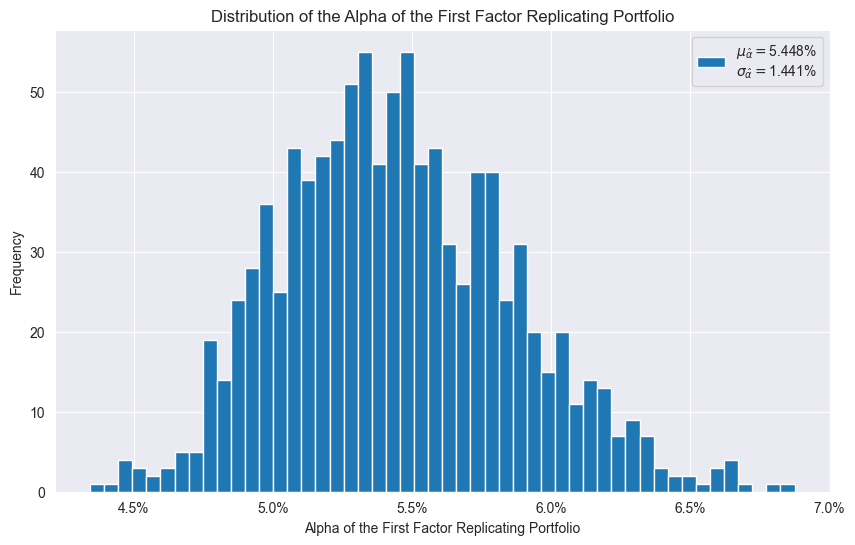

In [ ]:
model.plot_alpha_distribution()

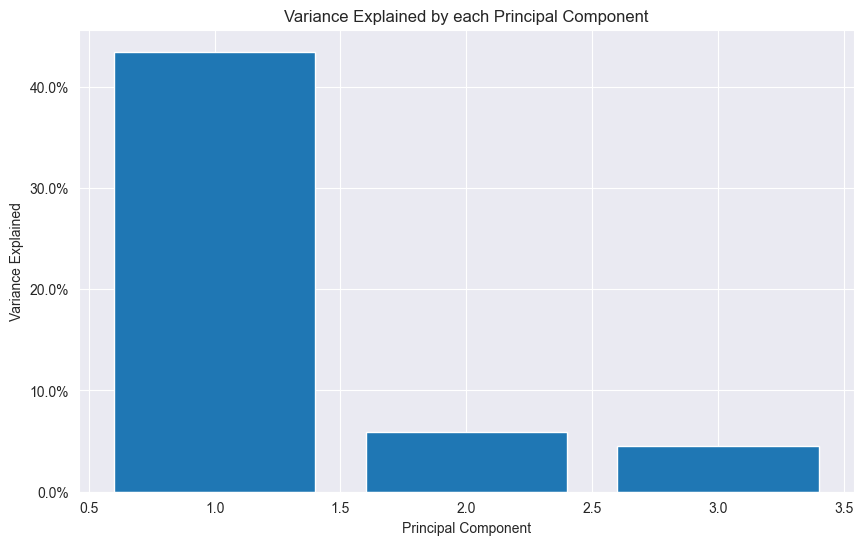

In [ ]:
model.plot_variance_explained()

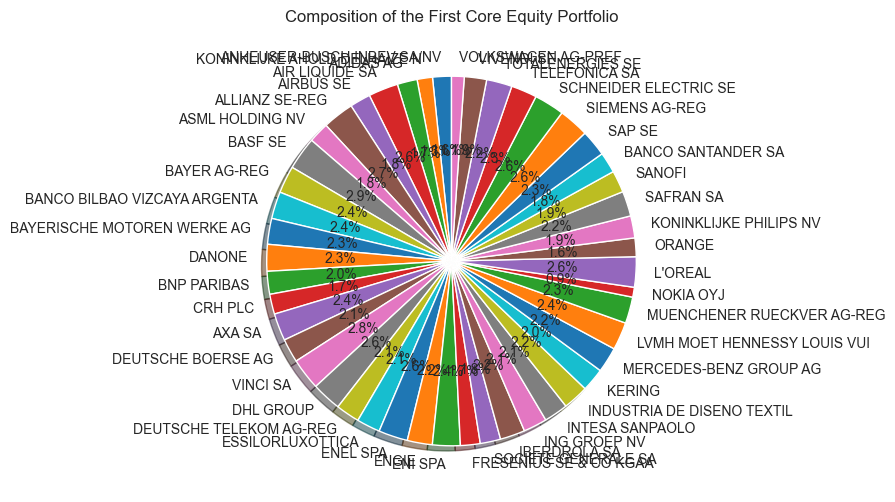

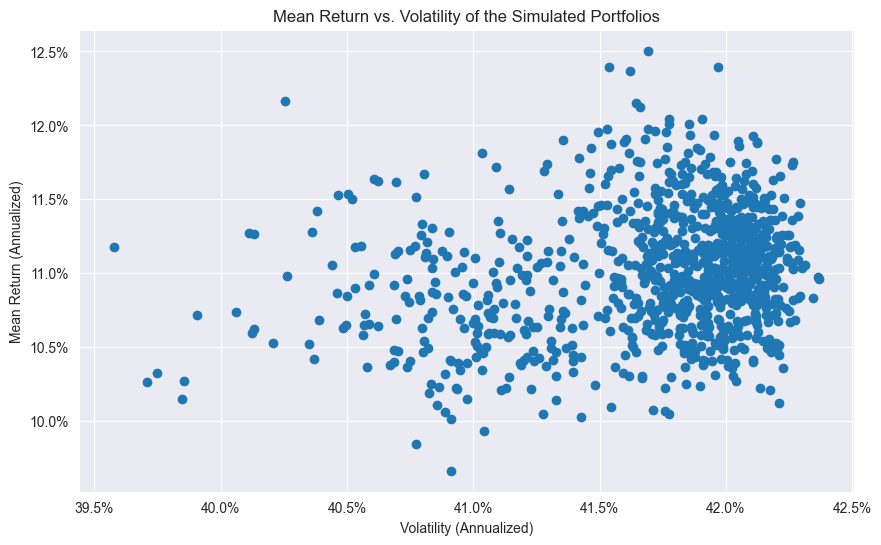

In [ ]:
model.plot_mean_vol_sim()

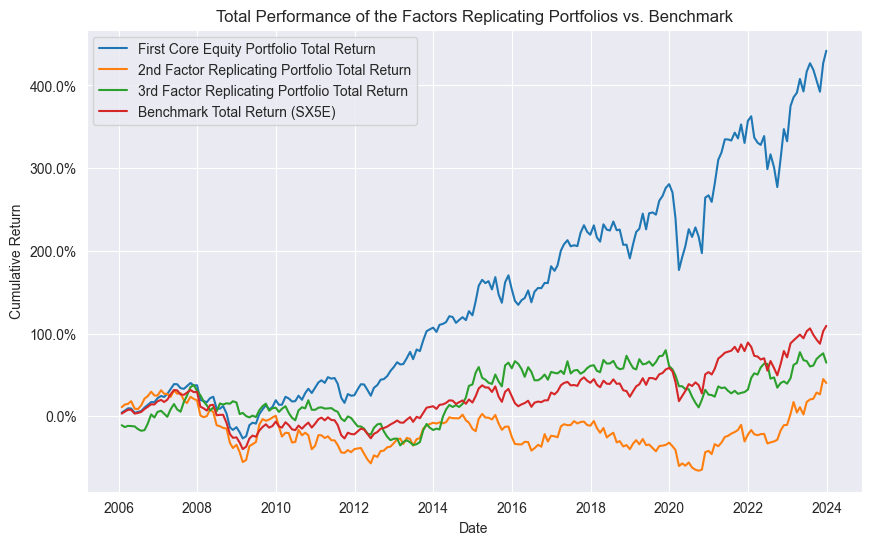

In [ ]:
model.plot_compared_performance(factor=3)

In [ ]:
higher_ptfs = model.compute_higher_factor_ptf()
higher_ptfs

{'Average return (annualized)': [0.0759, 0.0464],
 'Volatility (annualized)': [0.5873, 0.4418]}

In [ ]:
np.mean(model.rf)
np.mean(model.return_core_ptf) * 12

0.10967575988944386

In [ ]:
model.total_return_benchmark

Date
2006-01-31    0.032523
2006-02-28    0.056047
2006-03-31    0.079197
2006-04-28    0.078008
2006-05-31    0.032168
                ...   
2023-08-31    0.983365
2023-09-29    0.927990
2023-10-31    0.876918
2023-11-30    1.027817
2023-12-29    1.092927
Name: EUROSTOXX50, Length: 216, dtype: float64

([<matplotlib.patches.Wedge at 0x1592f3850>,
 [Text(-0.05680089771791937, 1.098532502030977, 'ANHEUSER-BUSCH INBEV SA/NV'),
  Text(-0.15953066712384867, 1.0883703258758115, 'KONINKLIJKE AHOLD DELHAIZE N'),
  Text(-0.26421128906896924, 1.0677979184885658, 'ADIDAS AG'),
  Text(-0.4069392456643518, 1.0219591236141143, 'AIR LIQUIDE SA'),
  Text(-0.5442473354470065, 0.9559261675772004, 'AIRBUS SE'),
  Text(-0.674951923681007, 0.8685849991332503, 'ALLIANZ SE-REG'),
  Text(-0.7913227264188923, 0.7640735191413004, 'ASML HOLDING NV'),
  Text(-0.894395432577273, 0.6403567835081571, 'BASF SE'),
  Text(-0.9874576036599039, 0.48469318230633324, 'BAYER AG-REG'),
  Text(-1.0485541549739101, 0.3324668165200087, 'BANCO BILBAO VIZCAYA ARGENTA'),
  Text(-1.0856450187189803, 0.1771295947340955, 'BAYERISCHE MOTOREN WERKE AG'),
  Text(-1.0998329975377483, 0.01916709490589579, 'DANONE'),
  Text(-1.0922444860700533, -0.13039165099639444, 'BNP PARIBAS'),
  Text(-1.0693702725563679, -0.2577735831552948, 'CRH PL

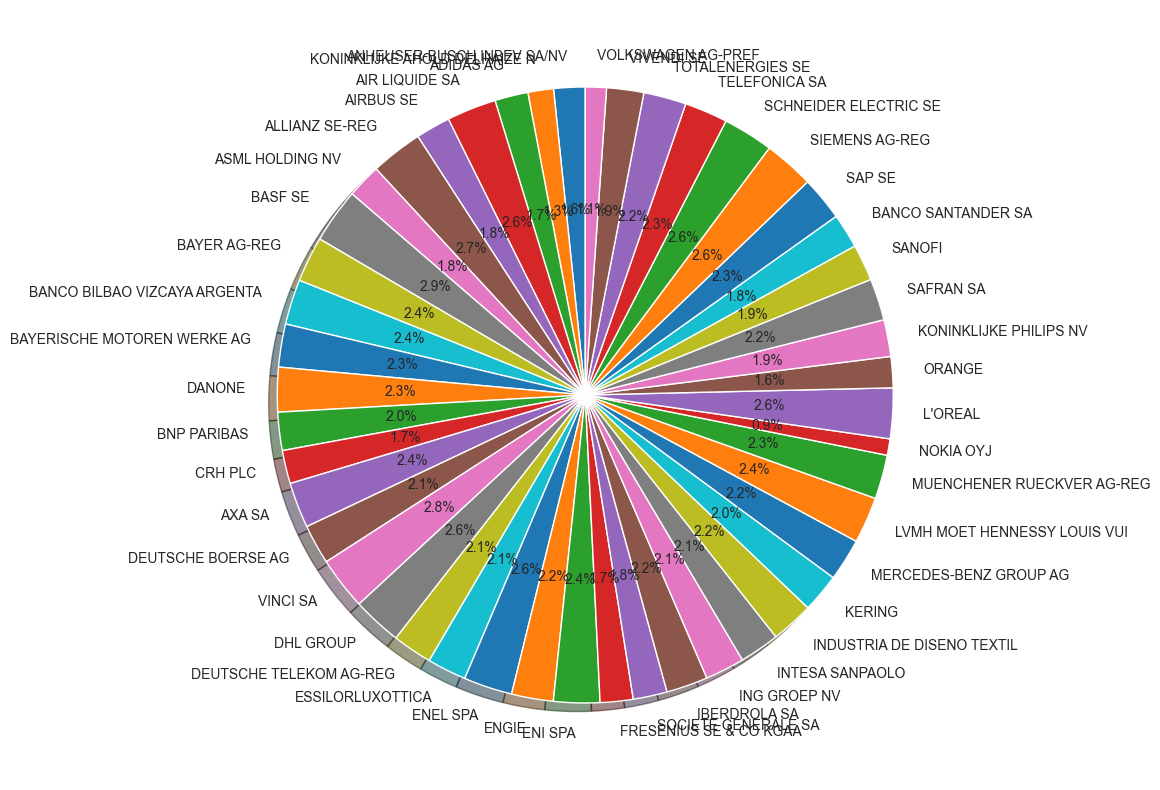

In [ ]:
# Plot the composition of the final portfolio in a pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    model.core_equity_ptf["weights"],
    labels=model.stocks,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
)

In [ ]:
model.alpha_core_ptf()

In [ ]:
model.pc_scores.describe()

,PC1,PC2,PC3
count,2.160000e+02,2.160000e+02,2.160000e+02
mean,1.413478e-18,5.139921e-19,1.798972e-18
std,5.076491e-02,5.076491e-02,5.076491e-02
min,-1.924989e-01,-1.426825e-01,-1.717021e-01
25%,-2.948973e-02,-2.782356e-02,-3.122824e-02
50%,3.008497e-03,-4.413220e-03,-2.301308e-03
75%,3.295041e-02,3.229714e-02,3.325475e-02
max,2.153294e-01,1.619428e-01,1.398146e-01


In [ ]:
# Count negative values in the first PC scores
negatives = 0
for i in model.pc_scores.iloc[:, 0]:
    if i < 0:
        negatives += 1
negatives
model.pc_scores.iloc[:, 0].describe()

count    2.160000e+02
mean     1.413478e-18
std      5.076491e-02
min     -1.924989e-01
25%     -2.948973e-02
50%      3.008497e-03
75%      3.295041e-02
max      2.153294e-01
Name: PC1, dtype: float64

In [ ]:
model.alpha_core_ptf()

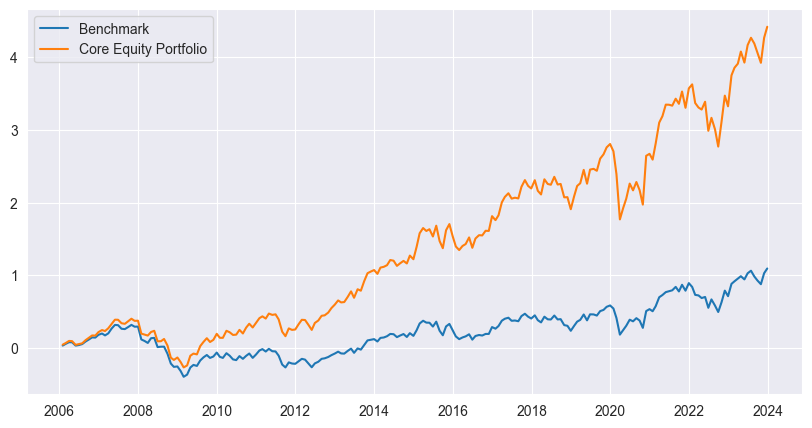

In [ ]:
bench_return = model.total_return_benchmark
core_eq_ptf_return = model.total_return_core_ptf
plt.figure(figsize=(10, 5))
plt.plot(bench_return, label="Benchmark")
plt.plot(core_eq_ptf_return, label="Core Equity Portfolio")
plt.legend()
plt.show()

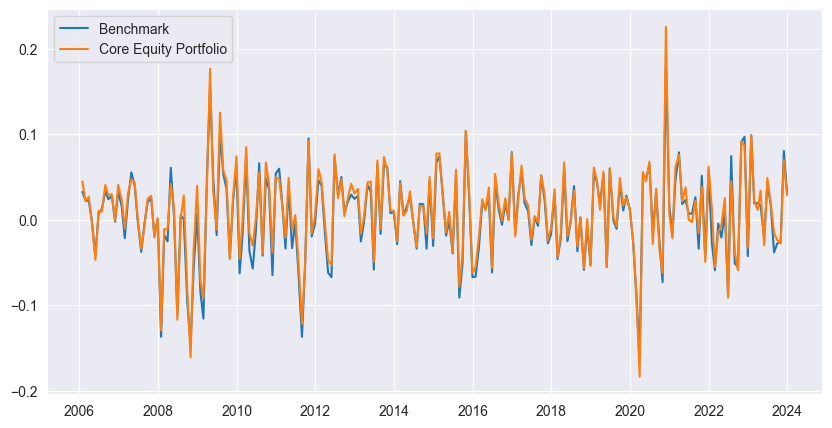

In [ ]:
bench_monthly_return = model.benchmark
core_eq_returns = model.return_core_ptf

plt.figure(figsize=(10, 5))
plt.plot(bench_monthly_return, label="Benchmark")
plt.plot(core_eq_returns, label="Core Equity Portfolio")
plt.legend()
plt.show()

In [ ]:
comparative_perf = model.comparative_perf
comparative_perf

AttributeError: 'CorePtf' object has no attribute 'comparative_perf'

In [ ]:
model.core_eq_1_exp.shape
model.core_equity_ptf["weights"].T @ model.core_eq_1_exp

0.9999999999620766

<Axes: xlabel='Date'>

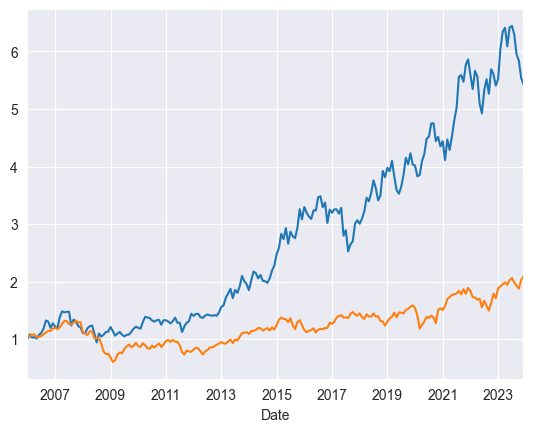

In [ ]:
(1 + returns["KONINKLIJKE AHOLD DELHAIZE N"]).cumprod().plot()
(1 + returns["EUROSTOXX50"]).cumprod().plot()

In [ ]:
model2 = smPCA(returns, standardize=False)
scores = model2.scores.iloc[:, 0]
model2.eigenvecs.iloc[:, 0] = model2.eigenvecs.iloc[:, 0] * -1

back_transformed_pc1 = np.matrix(scores).T @ np.matrix(model2.eigenvecs.iloc[:, 0])
back_transformed_pc1.shape

(216, 48)

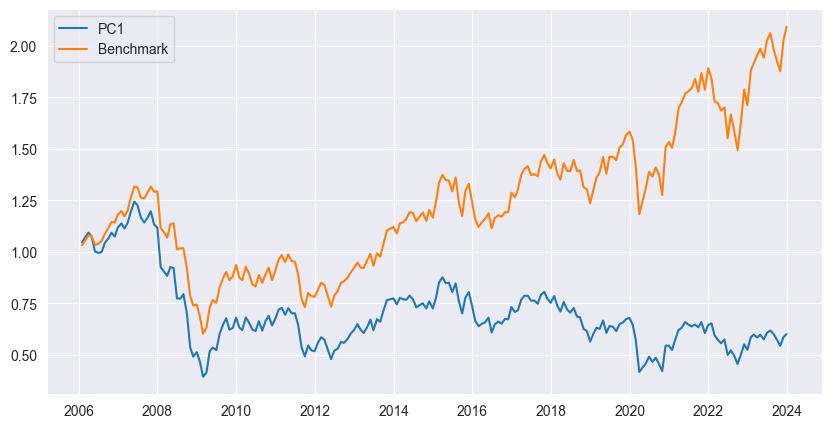

In [ ]:
from sklearn.preprocessing import StandardScaler


# pc_1 = pd.DataFrame(sc.fit_transform(model2.scores.iloc[: , 0].values.reshape(-1, 1))*-1 , index = returns.index)
pc_1 = pd.DataFrame(
    model2.scores.iloc[:, 0].values.reshape(-1, 1) * -1, index=returns.index
)
total_return_pc1 = np.cumprod(1 + pc_1)
total_return_bench = np.cumprod(1 + (returns["EUROSTOXX50"]))

plt.figure(figsize=(10, 5))
plt.plot(total_return_pc1, label="PC1")
plt.plot(total_return_bench, label="Benchmark")
plt.legend()
plt.show()

In [ ]:
ptf_vol = model.core_ptf_vol
ptf_vol

0.41891582322840026

In [ ]:
pc_scores = model.pc_scores
pc_scores["PC1"].std()

0.050764910928650354

In [ ]:
returns.describe()

,EUROSTOXX50,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.004719,0.009235,0.009438,0.011469,0.010269,0.012790,0.009630,0.022416,0.008509,0.005336,...,0.014702,0.005677,0.004669,0.009625,0.009900,0.012340,0.001822,0.007152,0.007125,0.015072
std,0.050765,0.077033,0.056254,0.081256,0.048141,0.097264,0.075614,0.084336,0.077142,0.077143,...,0.084905,0.055697,0.094139,0.067043,0.074604,0.069379,0.068537,0.061974,0.060066,0.110054
min,-0.162104,-0.344929,-0.160601,-0.269759,-0.134537,-0.451064,-0.397383,-0.230652,-0.227555,-0.242912,...,-0.354230,-0.177535,-0.333333,-0.310862,-0.293385,-0.224832,-0.221362,-0.142883,-0.167168,-0.449053
25%,-0.026895,-0.033515,-0.026484,-0.037737,-0.018405,-0.039596,-0.037497,-0.032616,-0.033279,-0.040933,...,-0.032477,-0.028364,-0.045075,-0.027954,-0.033332,-0.031554,-0.037932,-0.034402,-0.024462,-0.044302
50%,0.008448,0.011636,0.006234,0.004717,0.012138,0.014049,0.014540,0.018435,0.002692,0.008405,...,0.019366,0.007337,0.006434,0.008691,0.011766,0.016421,0.002278,0.007288,0.009075,0.013949
75%,0.038988,0.052773,0.048208,0.066161,0.037717,0.067244,0.056948,0.081537,0.056746,0.059824,...,0.060392,0.042959,0.054954,0.047408,0.055410,0.056590,0.042012,0.039040,0.045239,0.079135
max,0.180858,0.286258,0.164499,0.235201,0.139238,0.401661,0.308488,0.358156,0.302945,0.205594,...,0.351083,0.127686,0.474521,0.240377,0.232395,0.191674,0.303277,0.387490,0.160553,0.379032


In [ ]:
# Count of many negative values in the first eigenvector
model.eigenvectors

AttributeError: 'PCA' object has no attribute 'eigenvectors'

In [ ]:
# Function that checks the sign of the loadings of the first PC. If F1 the loading vector of the first PC
# contains more than 50% of negative values, the sign of the first loading is flipped.

pc_1_loading = model.pc_loadings["PC1"]

if pc_1_loading[pc_1_loading < 0].count() > pc_1_loading[pc_1_loading > 0].count():
    pc_1_loading = pc_1_loading * -1

pc_1_loading

ANHEUSER-BUSCH INBEV SA/NV      0.119566
KONINKLIJKE AHOLD DELHAIZE N    0.077389
ADIDAS AG                       0.122744
AIR LIQUIDE SA                  0.148624
AIRBUS SE                       0.144585
ALLIANZ SE-REG                  0.184044
ASML HOLDING NV                 0.127349
BASF SE                         0.178054
BAYER AG-REG                    0.137602
BANCO BILBAO VIZCAYA ARGENTA    0.172912
BAYERISCHE MOTOREN WERKE AG     0.161929
DANONE                          0.123768
BNP PARIBAS                     0.169315
CRH PLC                         0.125300
AXA SA                          0.180489
DEUTSCHE BOERSE AG              0.123987
VINCI SA                        0.175582
DHL GROUP                       0.154969
DEUTSCHE TELEKOM AG-REG         0.117049
ESSILORLUXOTTICA                0.123455
ENEL SPA                        0.152883
ENGIE                           0.135900
ENI SPA                         0.151456
FRESENIUS SE & CO KGAA          0.120225
SOCIETE GENERALE

In [ ]:
if 

In [ ]:
# Kaiser criterion
eigen_values = model.eigenvalues
variance_explained = model.variance_explained

<Axes: >

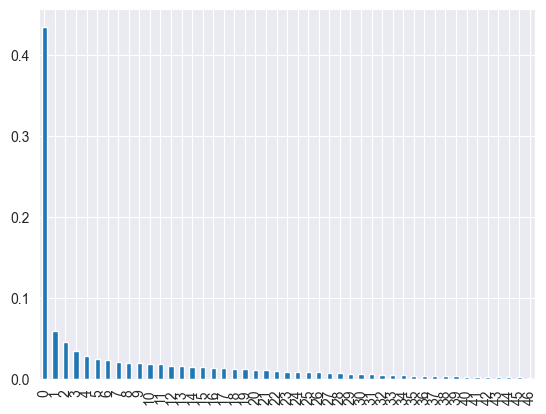

In [ ]:
variance_explained.plot.bar()

In [ ]:
pc_scores = model.pc_scores
pc_scores["PC1"].describe()
pc_scores["PC1"].std() - returns["EUROSTOXX50"].std()

0.017434523018396972

In [ ]:
bench = model.benchmark_vol
rescaled_pc = pc_scores * bench / pc_scores.std()
rescaled_pc.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47
count,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,...,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02
mean,-1.413478e-18,5.139921e-19,1.798972e-18,5.139921e-19,-2.055969e-18,-5.139921e-19,9.637353e-19,6.424902e-19,5.139921e-19,-5.139921e-19,...,-1.541976e-18,-2.055969e-18,1.284980e-18,2.377214e-18,1.027984e-18,-1.284980e-19,5.139921e-19,-1.027984e-18,-2.055969e-18,-6.167906e-18
std,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,...,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02
min,-2.153294e-01,-1.426825e-01,-1.717021e-01,-2.031607e-01,-1.445338e-01,-2.190930e-01,-1.976981e-01,-2.043661e-01,-2.056570e-01,-1.405602e-01,...,-2.259892e-01,-1.500523e-01,-1.630185e-01,-1.495365e-01,-2.011061e-01,-1.335858e-01,-1.641530e-01,-1.397553e-01,-1.613063e-01,-1.760354e-01
25%,-3.295041e-02,-2.782356e-02,-3.122824e-02,-2.803487e-02,-2.861675e-02,-3.041638e-02,-2.702291e-02,-3.190959e-02,-2.710261e-02,-3.319476e-02,...,-2.925337e-02,-2.788521e-02,-3.109706e-02,-3.920352e-02,-3.073767e-02,-3.418953e-02,-3.401367e-02,-3.237753e-02,-3.353406e-02,-3.124008e-02
50%,-3.008497e-03,-4.413220e-03,-2.301308e-03,-4.304690e-04,-3.862272e-04,-4.351865e-03,-1.976614e-03,5.825609e-04,5.964394e-04,7.056222e-04,...,-1.262193e-03,1.021936e-03,8.809663e-04,1.859046e-03,1.880117e-03,-2.829693e-03,-1.033227e-03,4.326527e-04,-5.649100e-03,-3.185547e-03
75%,2.948973e-02,3.229714e-02,3.325475e-02,2.824400e-02,2.867514e-02,2.941113e-02,2.498786e-02,3.154554e-02,3.012905e-02,3.405160e-02,...,3.196569e-02,3.606389e-02,3.317717e-02,3.727879e-02,3.366769e-02,3.404163e-02,3.071960e-02,3.521710e-02,3.443378e-02,3.267452e-02
max,1.924989e-01,1.619428e-01,1.398146e-01,1.942773e-01,1.409201e-01,1.995597e-01,2.080549e-01,1.637992e-01,1.863699e-01,1.558391e-01,...,1.580626e-01,1.594601e-01,1.636435e-01,1.128542e-01,1.226507e-01,1.560165e-01,1.531025e-01,1.134662e-01,1.703761e-01,1.571899e-01


In [ ]:
for i in stocks:
    print(returns[i].head())


print(returns.columns.tolist())

Date
2006-01-31    0.032523
2006-02-28    0.022783
2006-03-31    0.021922
2006-04-28   -0.001103
2006-05-31   -0.042522
Name: EUROSTOXX50, dtype: float64
Date
2006-01-31    0.054383
2006-02-28    0.000543
2006-03-31   -0.002326
2006-04-28    0.045571
2006-05-31   -0.061532
Name: ANHEUSER-BUSCH INBEV SA/NV, dtype: float64
Date
2006-01-31    0.003162
2006-02-28    0.077163
2006-03-31   -0.051172
2006-04-28    0.009242
2006-05-31   -0.025948
Name: KONINKLIJKE AHOLD DELHAIZE N, dtype: float64
Date
2006-01-31    0.075629
2006-02-28   -0.046946
2006-03-31   -0.005057
2006-04-28    0.025480
2006-05-31   -0.067838
Name: ADIDAS AG, dtype: float64
Date
2006-01-31    0.041231
2006-02-28   -0.021275
2006-03-31    0.037439
2006-04-28   -0.001745
2006-05-31   -0.032199
Name: AIR LIQUIDE SA, dtype: float64
Date
2006-01-31    0.010972
2006-02-28   -0.046203
2006-03-31    0.130364
2006-04-28   -0.100372
2006-05-31   -0.092904
Name: AIRBUS SE, dtype: float64
Date
2006-01-31    0.036812
2006-02-28    0.0

In [ ]:
scores = model.reduced_pc_scores  # PC1
scores

AttributeError: 'PCA' object has no attribute 'reduced_pc_scores'

In [ ]:
returns = model.returns
returns

,EUROSTOXX50,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-31,0.548973,0.587450,-0.111836,0.791435,0.644653,-0.018728,0.360331,0.893937,-0.080220,-0.407811,...,0.726423,0.250474,0.609178,1.353787,0.607245,1.863681,-0.199258,1.027593,-0.547727,0.692194
2006-02-28,0.356658,-0.113101,1.206704,-0.720566,-0.656768,-0.607933,0.147177,-0.996802,-0.431292,-0.288642,...,-0.379906,-1.068131,0.405336,0.082305,0.214294,-0.220279,0.415890,-1.268902,-0.332444,1.860823
2006-03-31,0.339669,-0.150425,-1.079948,-0.203849,0.565685,1.211619,0.105345,-0.648694,0.185272,-0.350194,...,-0.416729,1.687347,-0.223524,0.551600,-0.126023,0.386145,-0.015415,0.397898,1.775963,0.294621
2006-04-28,-0.114943,0.472788,-0.003508,0.172837,-0.250144,-1.166146,-0.616400,-0.301681,0.544118,1.326093,...,-0.495210,-0.961823,0.162330,-0.629100,-0.488848,-0.072889,-0.308970,-0.004235,0.234408,-0.396745
2006-05-31,-0.932751,-0.920792,-0.630504,-0.978275,-0.884207,-1.089186,-1.071373,-0.980918,-0.609978,-0.298167,...,-1.799564,-0.391060,-0.823193,-0.831097,-1.544507,-1.271754,0.350956,-0.899731,-0.078787,-0.881183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.850411,-0.007731,-0.582097,-0.113297,0.232279,-0.024117,0.296129,-1.048756,-0.638118,-0.705103,...,-0.381578,0.185143,-0.285229,0.387304,-1.528709,-0.486761,-0.226615,0.706741,0.472803,-0.705337
2023-09-29,-0.644429,-0.117661,-1.145421,-1.332046,-1.089742,-0.771209,-0.047903,-1.220477,-1.176828,-1.377835,...,-0.146493,0.415980,-0.000962,-0.840257,-0.444540,-0.324036,0.141630,1.271389,-0.345110,-0.467604
2023-10-31,-0.616192,0.157363,-0.493027,-0.098533,0.025865,-0.188607,-0.409549,-0.134629,0.066380,-1.438721,...,-0.302225,-2.900505,-0.260144,0.333266,-1.192680,-1.282652,-0.865967,0.115331,0.202966,-0.898901


In [ ]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

X = returns
X = add_constant(returns)
model = sm.OLS(scores, X, hascont=True)
results = model.fit()
results.summary()

/Users/romaincastellarnau/opt/anaconda3/envs/M2CLASS/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['hascont']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                comp_00   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.283e+28
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:04:07   Log-Likelihood:                 7129.3
No. Observations:                 216   AIC:                        -1.416e+04
Df Residuals:                     167   BIC:                        -1.400e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0106   1.21e-16   8.82e+13      0.000       0.011       0.011
EUROSTOXX50                     -0.0243   1.35e-14   -1.8e+12      0.000      -0.024      -0.024
ANHEUSER-BUSCH INBEV SA/NV      -0.0195   1.68e-15  -1.16e+13      0.000      -0.019      -0.019
KONINKLIJKE AHOLD DELHAIZE N    -0.0085   1.93e-15  -4.41e+12      0.000      -0.008      -0.008
ADIDAS AG                       -0.0215   1.52e-15  -1.41e+13      0.000      -0.021      -0.021
AIR LIQUIDE SA                  -0.0146   3.08e-15  -4.75e+12      0.000      -0.015      -0.015
AIRBUS SE                       -0.0315   1.58e-15  -1.99e+13      0.000      -0.031      -0.031
ALLIANZ SE-REG                  -0.0312   2.95e-15  -1.06e+13      0.000      -0.031      -0.031
ASML HOLDING NV                 -0.0234   1.59e-15  -1.48e+13      0.000      -0.023      -0.023
BASF SE                         -0.0302   2.49e-15  -1.21e+13      0.000      -0.030      -0.030
BAYER AG-REG                    -0.0225   1.72e-15  -1.31e+13      0.000      -0.023      -0.023
BANCO BILBAO VIZCAYA ARGENTA    -0.0399   2.42e-15  -1.65e+13      0.000      -0.040      -0.040
BAYERISCHE MOTOREN WERKE AG     -0.0300   2.29e-15  -1.31e+13      0.000      -0.030      -0.030
DANONE                          -0.0122   2.64e-15  -4.64e+12      0.000      -0.012      -0.012
BNP PARIBAS                     -0.0380   2.25e-15  -1.69e+13      0.000      -0.038      -0.038
CRH PLC                         -0.0202   1.65e-15  -1.22e+13      0.000      -0.020      -0.020
AXA SA                          -0.0397   2.46e-15  -1.61e+13      0.000      -0.040      -0.040
DEUTSCHE BOERSE AG              -0.0197   1.77e-15  -1.11e+13      0.000      -0.020      -0.020
VINCI SA                        -0.0252   2.78e-15  -9.07e+12      0.000      -0.025      -0.025
DHL GROUP                       -0.0271   2.03e-15  -1.33e+13      0.000      -0.027      -0.027
DEUTSCHE TELEKOM AG-REG         -0.0138    2.4e-15  -5.73e+12      0.000      -0.014      -0.014
ESSILORLUXOTTICA                -0.0143   2.32e-15  -6.17e+12      0.000      -0.014      -0.014
ENEL SPA                        -0.0213   2.67e-15     -8e+12      0.000      -0.021      -0.021
ENGIE                           -0.0203   2.01e-15  -1.01e+13      0.000      -0.020      -0.020
ENI SPA                         -0.0225   3.12e-15  -7.23e+12      0.000      -0.023      -0.023
FRESENIUS SE & CO KGAA          -0.0180   1.74e-15  -1.03e+13      0.000      -0.018      -0.018
SOCIETE GENERALE SA             -0.0482   1.99e-15  -2.42e+13      0.000      -0.048      -0.048
IBERDROLA SA                    -0.0189    2.4e-15  -7.86e+12      0.000      -0.019      -0.019
ING GROEP NV                    -0.0514   1.81e-15  -2.84e+13      0.000    

In [ ]:
model = sm.OLS(scores, add_constant(returns))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                comp_00   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.283e+28
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:07:00   Log-Likelihood:                 7129.3
No. Observations:                 216   AIC:                        -1.416e+04
Df Residuals:                     167   BIC:                        -1.400e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0106   1.21e-16   8.82e+13      0.000       0.011       0.011
EUROSTOXX50                     -0.0243   1.35e-14   -1.8e+12      0.000      -0.024      -0.024
ANHEUSER-BUSCH INBEV SA/NV      -0.0195   1.68e-15  -1.16e+13      0.000      -0.019      -0.019
KONINKLIJKE AHOLD DELHAIZE N    -0.0085   1.93e-15  -4.41e+12      0.000      -0.008      -0.008
ADIDAS AG                       -0.0215   1.52e-15  -1.41e+13      0.000      -0.021      -0.021
AIR LIQUIDE SA                  -0.0146   3.08e-15  -4.75e+12      0.000      -0.015      -0.015
AIRBUS SE                       -0.0315   1.58e-15  -1.99e+13      0.000      -0.031      -0.031
ALLIANZ SE-REG                  -0.0312   2.95e-15  -1.06e+13      0.000      -0.031      -0.031
ASML HOLDING NV                 -0.0234   1.59e-15  -1.48e+13      0.000      -0.023      -0.023
BASF SE                         -0.0302   2.49e-15  -1.21e+13      0.000      -0.030      -0.030
BAYER AG-REG                    -0.0225   1.72e-15  -1.31e+13      0.000      -0.023      -0.023
BANCO BILBAO VIZCAYA ARGENTA    -0.0399   2.42e-15  -1.65e+13      0.000      -0.040      -0.040
BAYERISCHE MOTOREN WERKE AG     -0.0300   2.29e-15  -1.31e+13      0.000      -0.030      -0.030
DANONE                          -0.0122   2.64e-15  -4.64e+12      0.000      -0.012      -0.012
BNP PARIBAS                     -0.0380   2.25e-15  -1.69e+13      0.000      -0.038      -0.038
CRH PLC                         -0.0202   1.65e-15  -1.22e+13      0.000      -0.020      -0.020
AXA SA                          -0.0397   2.46e-15  -1.61e+13      0.000      -0.040      -0.040
DEUTSCHE BOERSE AG              -0.0197   1.77e-15  -1.11e+13      0.000      -0.020      -0.020
VINCI SA                        -0.0252   2.78e-15  -9.07e+12      0.000      -0.025      -0.025
DHL GROUP                       -0.0271   2.03e-15  -1.33e+13      0.000      -0.027      -0.027
DEUTSCHE TELEKOM AG-REG         -0.0138    2.4e-15  -5.73e+12      0.000      -0.014      -0.014
ESSILORLUXOTTICA                -0.0143   2.32e-15  -6.17e+12      0.000      -0.014      -0.014
ENEL SPA                        -0.0213   2.67e-15     -8e+12      0.000      -0.021      -0.021
ENGIE                           -0.0203   2.01e-15  -1.01e+13      0.000      -0.020      -0.020
ENI SPA                         -0.0225   3.12e-15  -7.23e+12      0.000      -0.023      -0.023
FRESENIUS SE & CO KGAA          -0.0180   1.74e-15  -1.03e+13      0.000      -0.018      -0.018
SOCIETE GENERALE SA             -0.0482   1.99e-15  -2.42e+13      0.000      -0.048      -0.048
IBERDROLA SA                    -0.0189    2.4e-15  -7.86e+12      0.000      -0.019      -0.019
ING GROEP NV                    -0.0514   1.81e-15  -2.84e+13      0.000    

In [ ]:
result.params[0]
betas = result.params[1:]
betas[0]

/var/folders/cq/3rtfz4ks5pj93gvxq4s08n7m0000gn/T/ipykernel_21892/2415665859.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.params[0]
/var/folders/cq/3rtfz4ks5pj93gvxq4s08n7m0000gn/T/ipykernel_21892/2415665859.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[0]


-0.024285809339427242